**Materia: Visión por Computadora 1**

Alumno: Ezequiel Alejandro Caamaño

Cohorte: 18va.

Trabajo Práctico Nro. 1

▪
*Parte 1 (imágenes en /white_patchy):*


1. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

2. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

▪
*Parte 2:*

1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

In [1]:

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mostrar imágenes en la notebook
%matplotlib inline


In [2]:
def white_patch(img):
    """
    Aplica corrección de color por White Patch.
    img: imagen en formato BGR (OpenCV)
    return: imagen corregida en formato BGR
    """
    # Convertir a float para evitar overflow
    img = img.astype(np.float32)

    # Calcular máximo por canal (en el eje de filas y columnas)
    max_vals = img.max(axis=(0, 1))

    # Evitar división por cero
    max_vals[max_vals == 0] = 1

    # Escalar cada canal
    corrected = img / max_vals * 255.0

    # Limitar valores a 0-255 y convertir a uint8
    corrected = np.clip(corrected, 0, 255).astype(np.uint8)

    return corrected


In [3]:
input_folder = "images/white_patch"

# Obtener lista de archivos de imagen
image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Diccionario para almacenar resultados
results = []

for file in image_files:
    path = os.path.join(input_folder, file)
    original = cv2.imread(path)  # BGR
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    corrected = white_patch(original)
    corrected_rgb = cv2.cvtColor(corrected, cv2.COLOR_BGR2RGB)

    results.append((file, original_rgb, corrected_rgb))


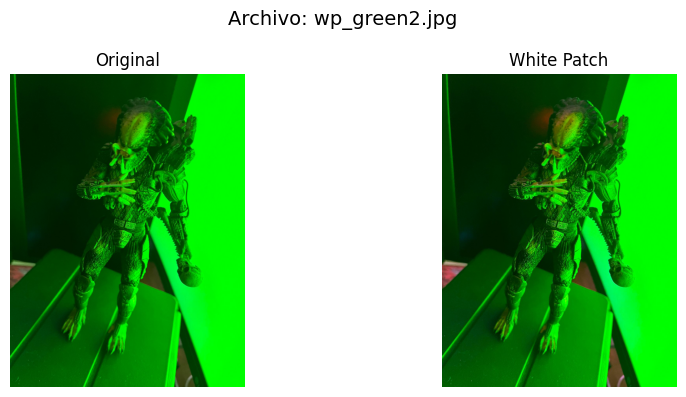

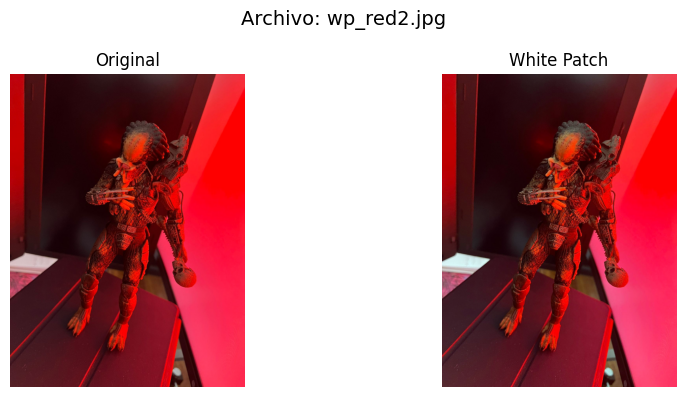

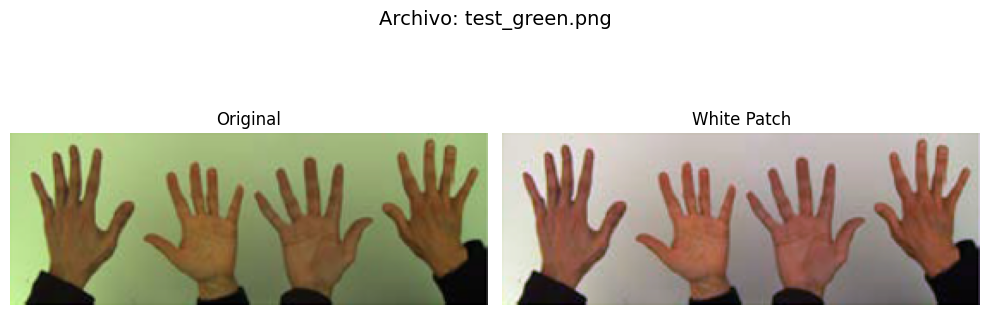

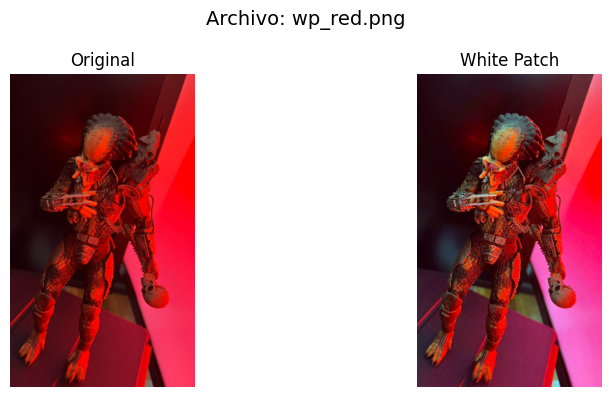

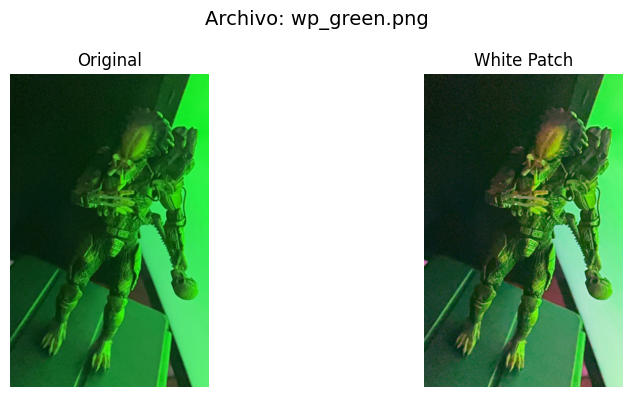

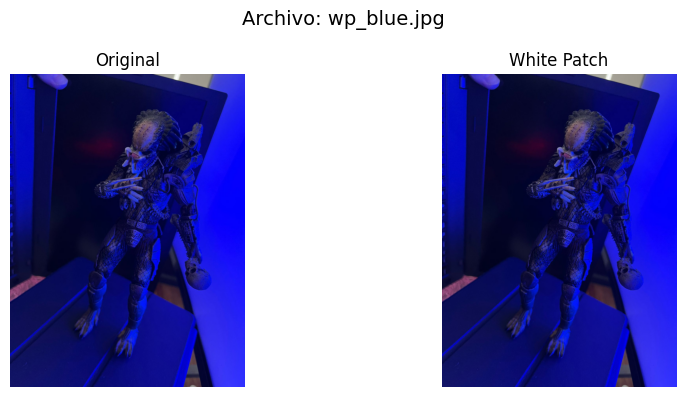

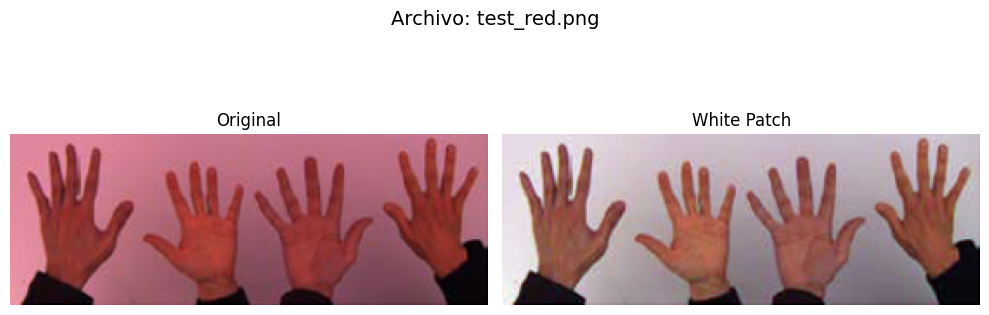

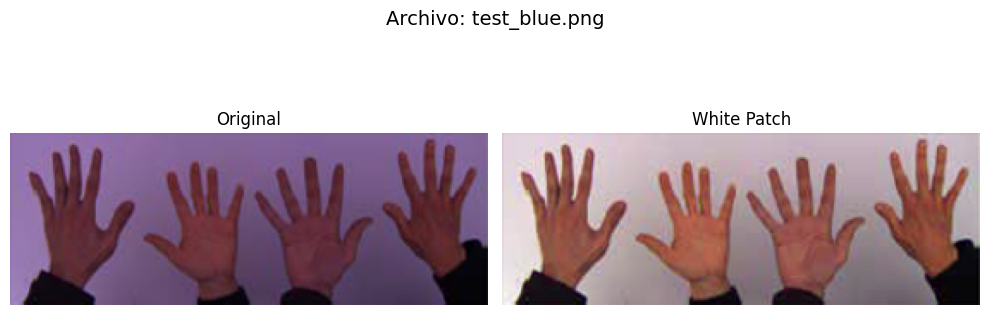

In [4]:

def show_results(results):
    for name, orig, corr in results:
        plt.figure(figsize=(10, 4))
        plt.suptitle(f"Archivo: {name}", fontsize=14)
        
        plt.subplot(1, 2, 1)
        plt.imshow(orig)
        plt.title("Original")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(corr)
        plt.title("White Patch")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

show_results(results)


Análisis:
- White Patch funciona bien si en la imagen hay una zona que realmente debería ser blanca.
- Si no hay blancos reales en la imagen, el algoritmo puede "blanquear" erróneamente otro color.
- Puede sobresaturar zonas claras o introducir tonos artificiales si el máximo en un canal es atípico.

En imágenes con tonos apagados o sombras, suele mejorar la percepción visual.
En imágenes donde los canales no tienen blancos puros, el resultado puede ser irreal.


*Parte 2*

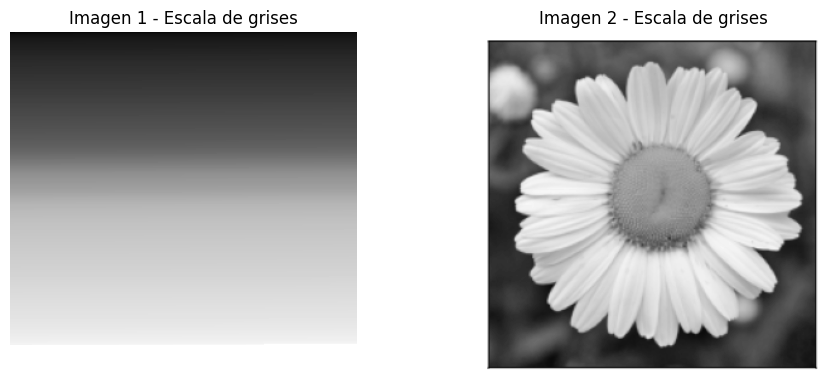

In [5]:
import cv2
import matplotlib.pyplot as plt
import os

# Rutas de las imágenes
img1_path = "images/img1_tp.png"
img2_path = "Images/img2_tp.png"

# Cargar imágenes en escala de grises
img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

# Mostrar las imágenes
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('Imagen 1 - Escala de grises')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('Imagen 2 - Escala de grises')
plt.axis('off')

plt.tight_layout()
plt.show()


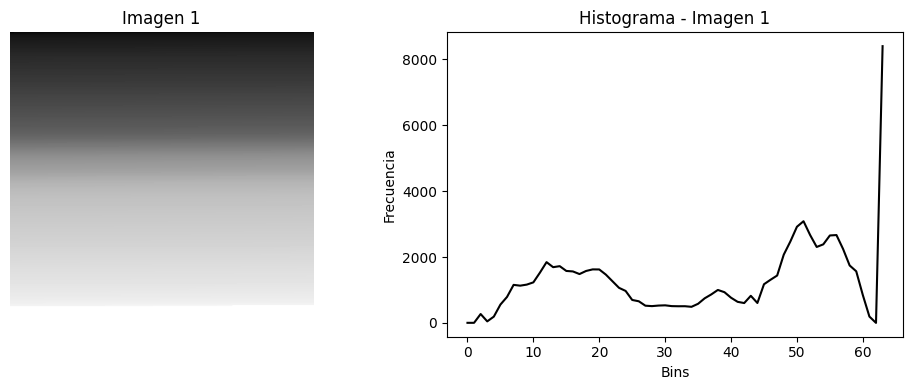

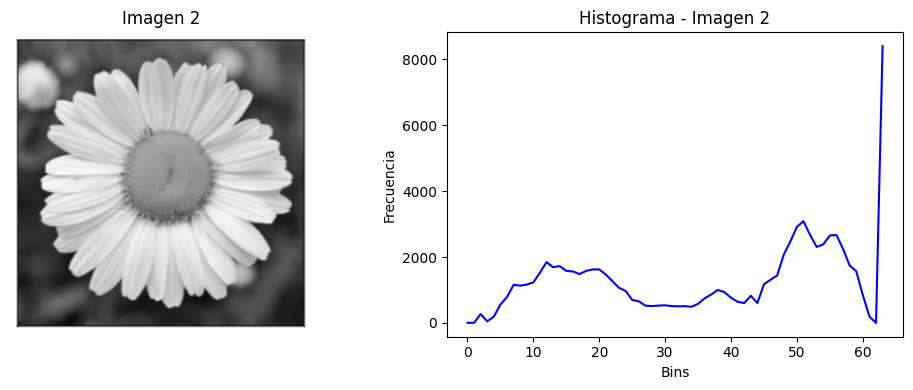

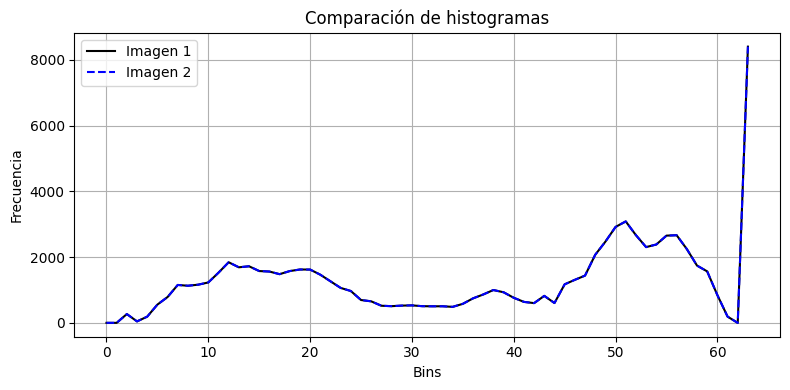

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Leer imágenes en escala de grises
img1 = cv2.imread('images/img1_tp.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('images/img2_tp.png', cv2.IMREAD_GRAYSCALE)

# Validar que se hayan cargado bien
assert img1 is not None, "No se pudo cargar img1_tp.png"
assert img2 is not None, "No se pudo cargar img2_tp.png"

# Calcular histogramas
bins = 64
hist1 = cv2.calcHist([img1], [0], None, [bins], [0, 256])
hist2 = cv2.calcHist([img2], [0], None, [bins], [0, 256])

# Mostrar imagen 1 con su histograma
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('Imagen 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(hist1, color='black')
plt.title('Histograma - Imagen 1')
plt.xlabel('Bins')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Mostrar imagen 2 con su histograma
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img2, cmap='gray')
plt.title('Imagen 2')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(hist2, color='blue')
plt.title('Histograma - Imagen 2')
plt.xlabel('Bins')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Mostrar ambos histogramas superpuestos
plt.figure(figsize=(8, 4))
plt.plot(hist1, color='black', label='Imagen 1')
plt.plot(hist2, color='blue', linestyle='--', label='Imagen 2')
plt.title('Comparación de histogramas')
plt.xlabel('Bins')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



 1. Los histogramas no capturan la estructura espacial.
Aunque las imágenes sean distintas visualmente, si tienen los mismos valores de gris distribuidos globalmente, el histograma será el mismo. En este caso en particular se observa como dos imagenes completamente distintas en su forma, muestran exactamente el mismo histograma. 

Esto muestra que el histograma no tiene información sobre la posición de los píxeles, solo sobre su intensidad.

 2. ¿Sirven como feature para clasificación o detección?
Para clasificaciòn general evaluando ciertas características como tipo de imagen, iluminación, etc., sí pueden ser útiles. Por ejemplo, podrìa detectar si una imagen es oscura, clara, tiene mucho contraste, etc.

Pero en el caso de detección de objetos o formas no es suficiente. 